In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

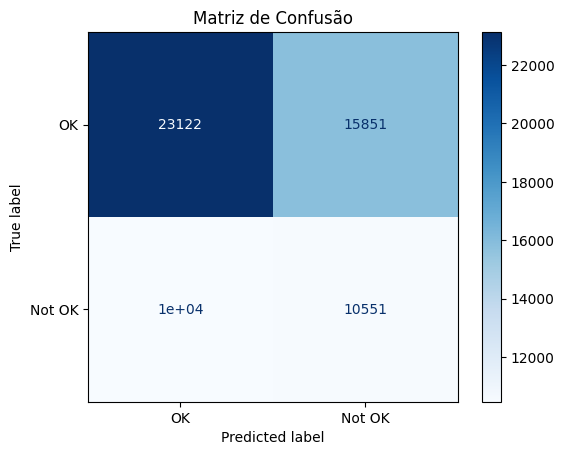

              precision    recall  f1-score   support

          OK       0.69      0.59      0.64     38973
      Not OK       0.40      0.50      0.44     21027

    accuracy                           0.56     60000
   macro avg       0.54      0.55      0.54     60000
weighted avg       0.59      0.56      0.57     60000


Coeficientes do modelo:
temperature: 0.0342
humidity: 0.1243
voltage: -0.0405
current: 0.1363
power: 0.1827


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# =============================
# 1. Carregar os dados
# =============================

df = pd.read_csv("sensor_data_3.csv")

df["target"] = df["estado"].apply(lambda x: 0 if x == "OK" else 1)

# =============================
# 2. Seleção de features
# =============================
features = ["temperature", "humidity", "voltage", "current", "power"]
X = df[features]
y = df["target"]

# =============================
# 3. Dividir em treino e teste
# =============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# =============================
# 4. Normalização dos dados
# =============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =============================
# 5. Treinamento do modelo
# =============================
model = LogisticRegression(class_weight="balanced", max_iter=1000)
model.fit(X_train_scaled, y_train)

# =============================
# 6. Avaliação do modelo
# =============================
y_pred = model.predict(X_test_scaled)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["OK", "Not OK"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()

report = classification_report(y_test, y_pred, target_names=["OK", "Not OK"])
print(report)

# =============================
# 7. Análise dos coeficientes
# =============================
print("\nCoeficientes do modelo:")
for feature, coef in zip(features, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")



--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.72      0.99      0.84     38973
           1       0.97      0.29      0.45     21027

    accuracy                           0.75     60000
   macro avg       0.84      0.64      0.64     60000
weighted avg       0.81      0.75      0.70     60000


Coeficientes Regressão Logística:
temperature: 0.0841
humidity: 0.1696
voltage: 0.2538
current: 1.9695
power: -1.2805
temp_x_current: -0.0570
power_ratio: 2.8327
potencia_aparente: -0.7626


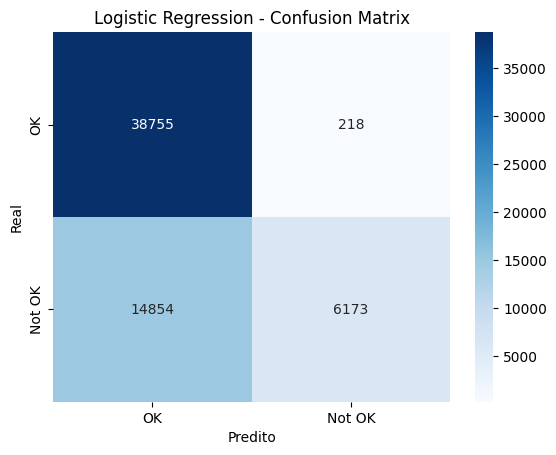

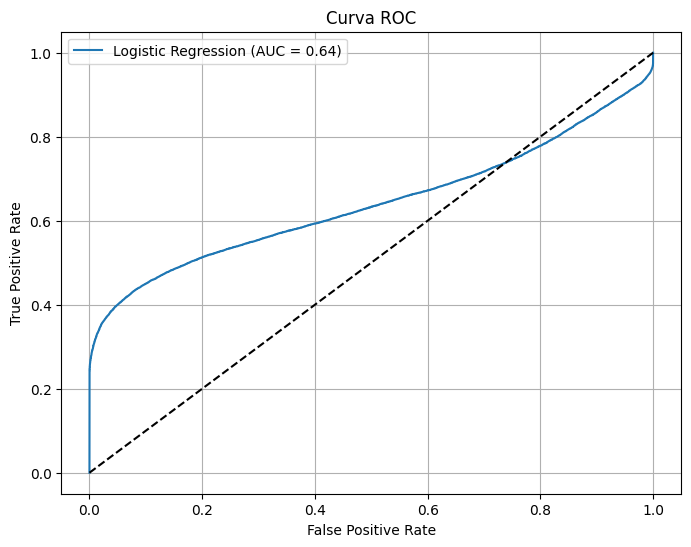

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


df = pd.read_csv("sensor_data_3.csv")


df['estado'] = df['estado'].map({'OK': 0, 'Not OK': 1})

# variáveis auxiliares
df['temp_x_current'] = df['temperature'] * df['current']
df['power_ratio'] = df['power'] / (df['voltage'] * df['current'] + 1e-5)  # evitar divisão por zero
df['potencia_aparente'] = df['voltage'] * df['current']


features = ['temperature', 'humidity', 'voltage', 'current', 'power',
            'temp_x_current', 'power_ratio', 'potencia_aparente']
X = df[features]
y = df['estado']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


logreg = LogisticRegression(max_iter=1000)


logreg.fit(X_train, y_train)


print("\n--- Logistic Regression ---")
y_pred_log = logreg.predict(X_test)
print(classification_report(y_test, y_pred_log))


print("\nCoeficientes Regressão Logística:")
for feature, coef in zip(features, logreg.coef_[0]):
    print(f"{feature}: {coef:.4f}")



def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['OK', 'Not OK'], yticklabels=['OK', 'Not OK'])
    plt.title(title)
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.show()

plot_conf_matrix(y_test, y_pred_log, "Logistic Regression - Confusion Matrix")


def plot_roc_curve(model, X_test, y_test, label):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.2f})')

plt.figure(figsize=(8,6))
plot_roc_curve(logreg, X_test, y_test, "Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Curva ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


In [ ]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

print("\n--- Random Forest ---")
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))


importances = rf.feature_importances_
print("\nImportância Random Forest:")
for feature, imp in sorted(zip(features, importances), key=lambda x: -x[1]):
    print(f"{feature}: {imp:.4f}")


plot_conf_matrix(y_test, y_pred_rf, "Random Forest - Confusion Matrix")



--- Logistic Regression (com class_weight='balanced') ---
              precision    recall  f1-score   support

           0       0.75      0.83      0.79     38973
           1       0.61      0.49      0.55     21027

    accuracy                           0.71     60000
   macro avg       0.68      0.66      0.67     60000
weighted avg       0.70      0.71      0.71     60000


Coeficientes Regressão Logística:
temperature: 0.0696
humidity: 0.1354
voltage: 0.2034
current: 1.6112
power: -1.1111
temp_x_current: -0.0465
power_ratio: 2.4445
potencia_aparente: -0.5802


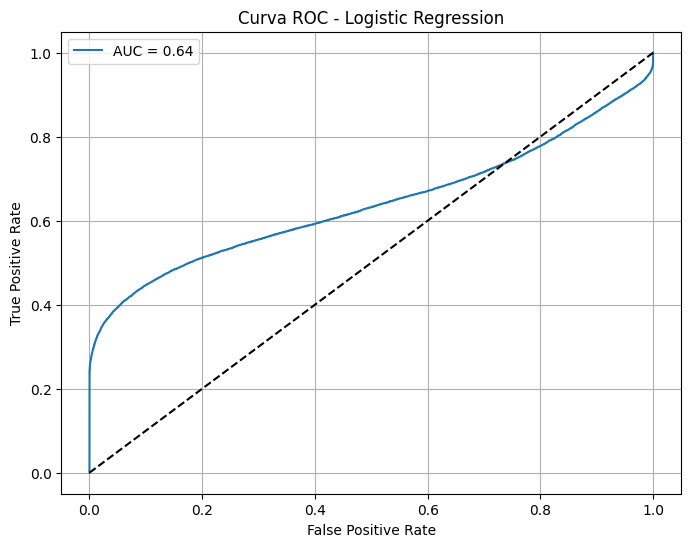

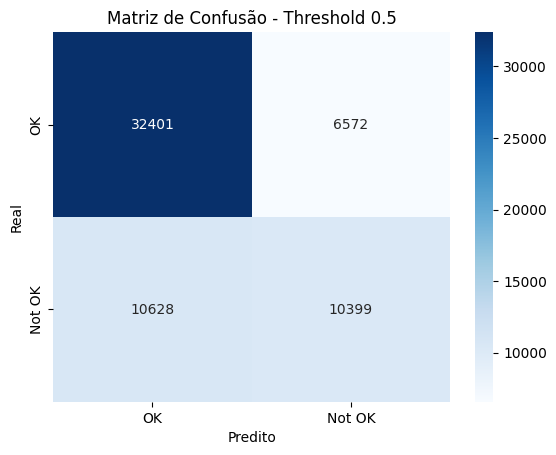

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

logreg = LogisticRegression(max_iter=1000, class_weight='balanced')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

print("\n--- Logistic Regression (com class_weight='balanced') ---")
print(classification_report(y_test, y_pred))

print("\nCoeficientes Regressão Logística:")
for feature, coef in zip(features, logreg.coef_[0]):
    print(f"{feature}: {coef:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.title("Curva ROC - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['OK', 'Not OK'], yticklabels=['OK', 'Not OK'])
plt.title("Matriz de Confusão - Threshold 0.5")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()


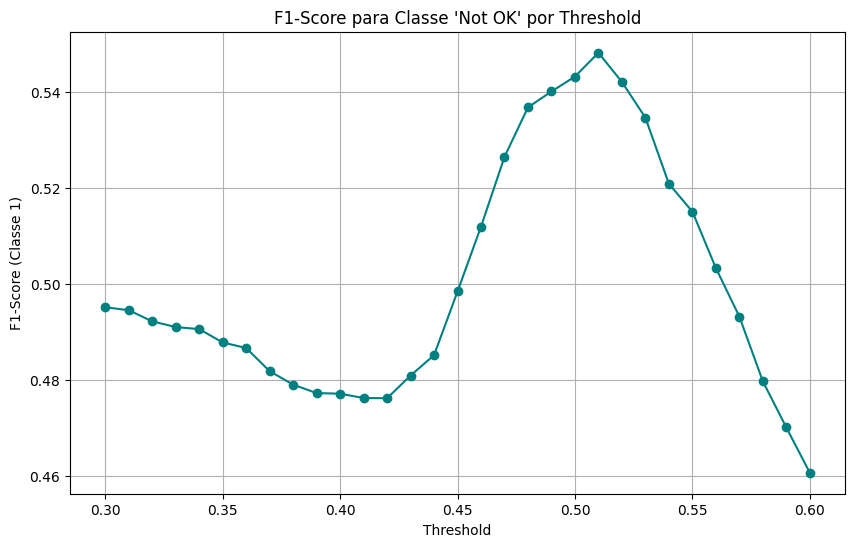

🔍 Melhor threshold com maior F1-score: 0.51

--- Métricas com threshold = 0.51 ---
              precision    recall  f1-score   support

           0       0.75      0.87      0.80      3896
           1       0.65      0.47      0.55      2104

    accuracy                           0.73      6000
   macro avg       0.70      0.67      0.68      6000
weighted avg       0.72      0.73      0.71      6000



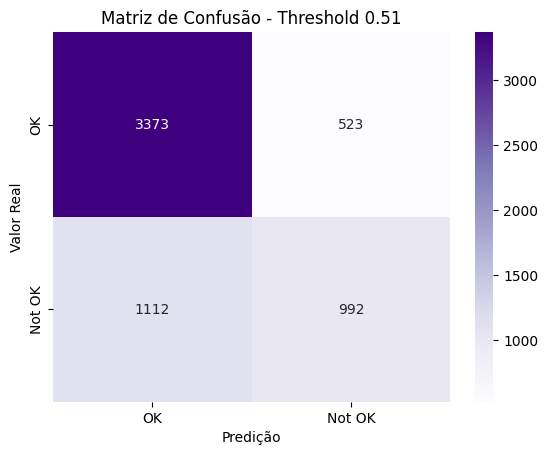

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score

df = pd.read_csv("sensor_data_2.csv")

df['estado_bin'] = df['estado'].map({'OK': 0, 'Not OK': 1})

df['temp_x_current'] = df['temperature'] * df['current']
df['power_ratio'] = df['power'] / (df['voltage'] * df['current'] + 1e-6)
df['potencia_aparente'] = df['voltage'] * df['current']

features = ['temperature', 'humidity', 'voltage', 'current', 'power',
            'temp_x_current', 'power_ratio', 'potencia_aparente']
X = df[features]
y = df['estado_bin']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)


y_proba = model.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.3, 0.61, 0.01)
f1_scores = []

for t in thresholds:
    y_pred_thresh = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    f1_scores.append(f1)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='o', color='teal')
plt.title("F1-Score para Classe 'Not OK' por Threshold")
plt.xlabel("Threshold")
plt.ylabel("F1-Score (Classe 1)")
plt.grid(True)
plt.show()

best_thresh = thresholds[np.argmax(f1_scores)]
print(f"🔍 Melhor threshold com maior F1-score: {best_thresh:.2f}")


y_pred_best = (y_proba >= best_thresh).astype(int)
print(f"\n--- Métricas com threshold = {best_thresh:.2f} ---")
print(classification_report(y_test, y_pred_best))


sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Purples',
            xticklabels=['OK', 'Not OK'], yticklabels=['OK', 'Not OK'])
plt.title(f"Matriz de Confusão - Threshold {best_thresh:.2f}")
plt.xlabel("Predição")
plt.ylabel("Valor Real")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4910, number of negative: 9090
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010891 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 14000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3896
           1       0.99      1.00      1.00      2104

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000


--- Confusion Matrix ---


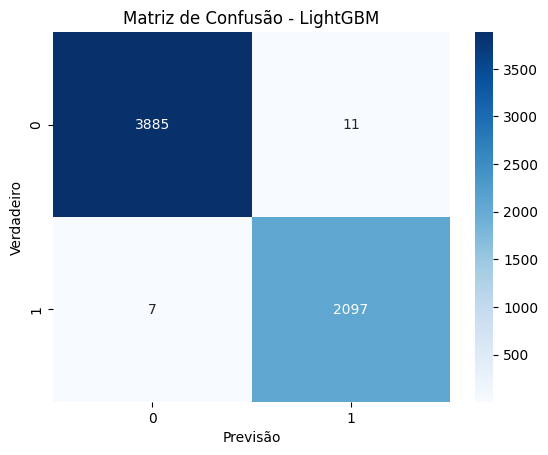

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("sensor_data_2.csv")


df["estado"] = df["estado"].map({"OK": 0, "Not OK": 1})


df["potencia_aparente"] = df["voltage"] * df["current"]
df["power_ratio"] = df["power"] / df["potencia_aparente"]
df["power_ratio"] = df["power_ratio"].replace([float("inf"), -float("inf")], 0).fillna(0)
df["temp_x_current"] = df["temperature"] * df["current"]


features = ["temperature", "humidity", "voltage", "current", "power",
            "potencia_aparente", "power_ratio", "temp_x_current"]
X = df[features]
y = df["estado"]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)


model = lgb.LGBMClassifier(class_weight="balanced", random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsão")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão - LightGBM")
plt.show()



--- Classification Report ---
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      3896
           1       1.00      0.69      0.82      2104

    accuracy                           0.89      6000
   macro avg       0.93      0.84      0.87      6000
weighted avg       0.91      0.89      0.88      6000


--- Confusion Matrix ---


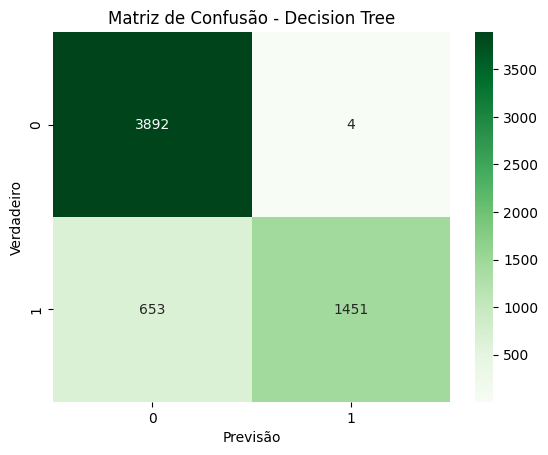

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("sensor_data_2.csv")

df["estado"] = df["estado"].map({"OK": 0, "Not OK": 1})

df["potencia_aparente"] = df["voltage"] * df["current"]
df["power_ratio"] = df["power"] / df["potencia_aparente"]
df["power_ratio"] = df["power_ratio"].replace([float("inf"), -float("inf")], 0).fillna(0)
df["temp_x_current"] = df["temperature"] * df["current"]

features = ["temperature", "humidity", "voltage", "current", "power",
            "potencia_aparente", "power_ratio", "temp_x_current"]
X = df[features]
y = df["estado"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)

model = DecisionTreeClassifier(
    max_depth=5,
    class_weight="balanced",
    random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Previsão")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão - Decision Tree")
plt.show()
